# A304_SRO_NGO_Hall_10K_p1.5T_to_n1.5T

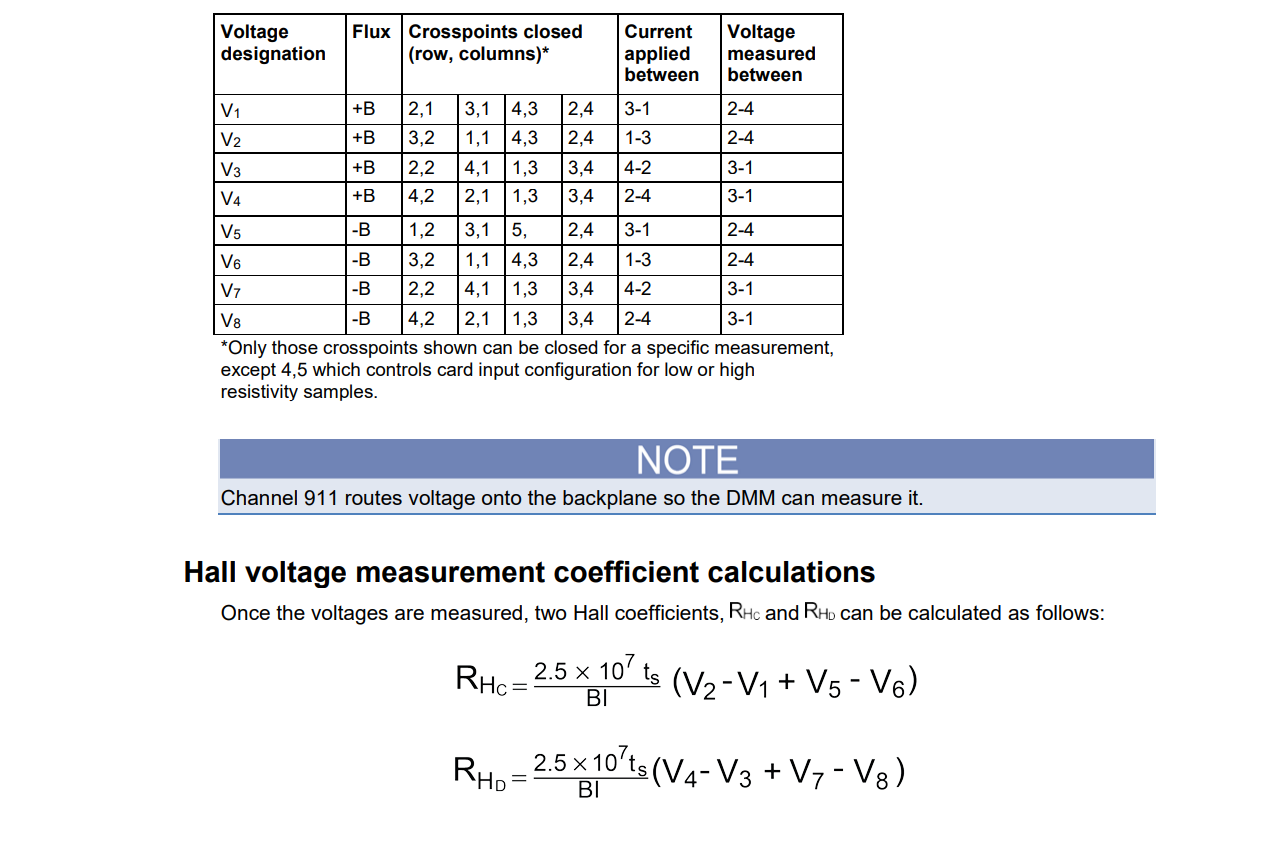

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [178]:
filename='C:\\Users\\Admin\\Desktop\\Data\\7_june_2023\\A304_SRO_NGO_Hall_125K_p1_5T_n1_5T.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,15000.575781,9.999969,102.742157,-102.761948,-197.942077,197.961568,1.640000e-07,1000000
1,0.001,14000.554004,10.000032,103.897873,-103.893551,-197.704119,197.745375,1.201000e-07,1000000
2,0.001,13000.295703,10.000033,105.059618,-105.069953,-197.440147,197.492945,8.660000e-08,1000000
3,0.001,12000.598975,9.999999,106.235689,-106.217609,-197.215692,197.253533,7.390000e-08,1000000
4,0.001,11000.548877,9.999980,107.400745,-107.395585,-196.963112,197.003893,5.360000e-08,1000000
...,...,...,...,...,...,...,...,...,...
79,0.001,9000.311475,10.000091,110.539816,-110.533367,-195.201056,195.245930,-6.630000e-08,1000000
80,0.001,10000.470361,10.000083,108.873710,-108.855808,-195.948584,195.991876,-7.250000e-08,1000000
81,0.001,11000.441162,10.000072,107.515876,-107.489615,-196.452623,196.511356,-7.730000e-08,1000000
82,0.001,12000.506934,10.000037,106.244023,-106.243121,-196.837747,196.882305,-6.540000e-08,1000000


### Converting B to integer B

In [179]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [180]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,15000.575781,15000,9.999969,102.742157,-102.761948,-197.942077,197.961568,1.640000e-07,1000000
1,0.001,14000.554004,14000,10.000032,103.897873,-103.893551,-197.704119,197.745375,1.201000e-07,1000000
2,0.001,13000.295703,13000,10.000033,105.059618,-105.069953,-197.440147,197.492945,8.660000e-08,1000000
3,0.001,12000.598975,12000,9.999999,106.235689,-106.217609,-197.215692,197.253533,7.390000e-08,1000000
4,0.001,11000.548877,11000,9.999980,107.400745,-107.395585,-196.963112,197.003893,5.360000e-08,1000000


In [181]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

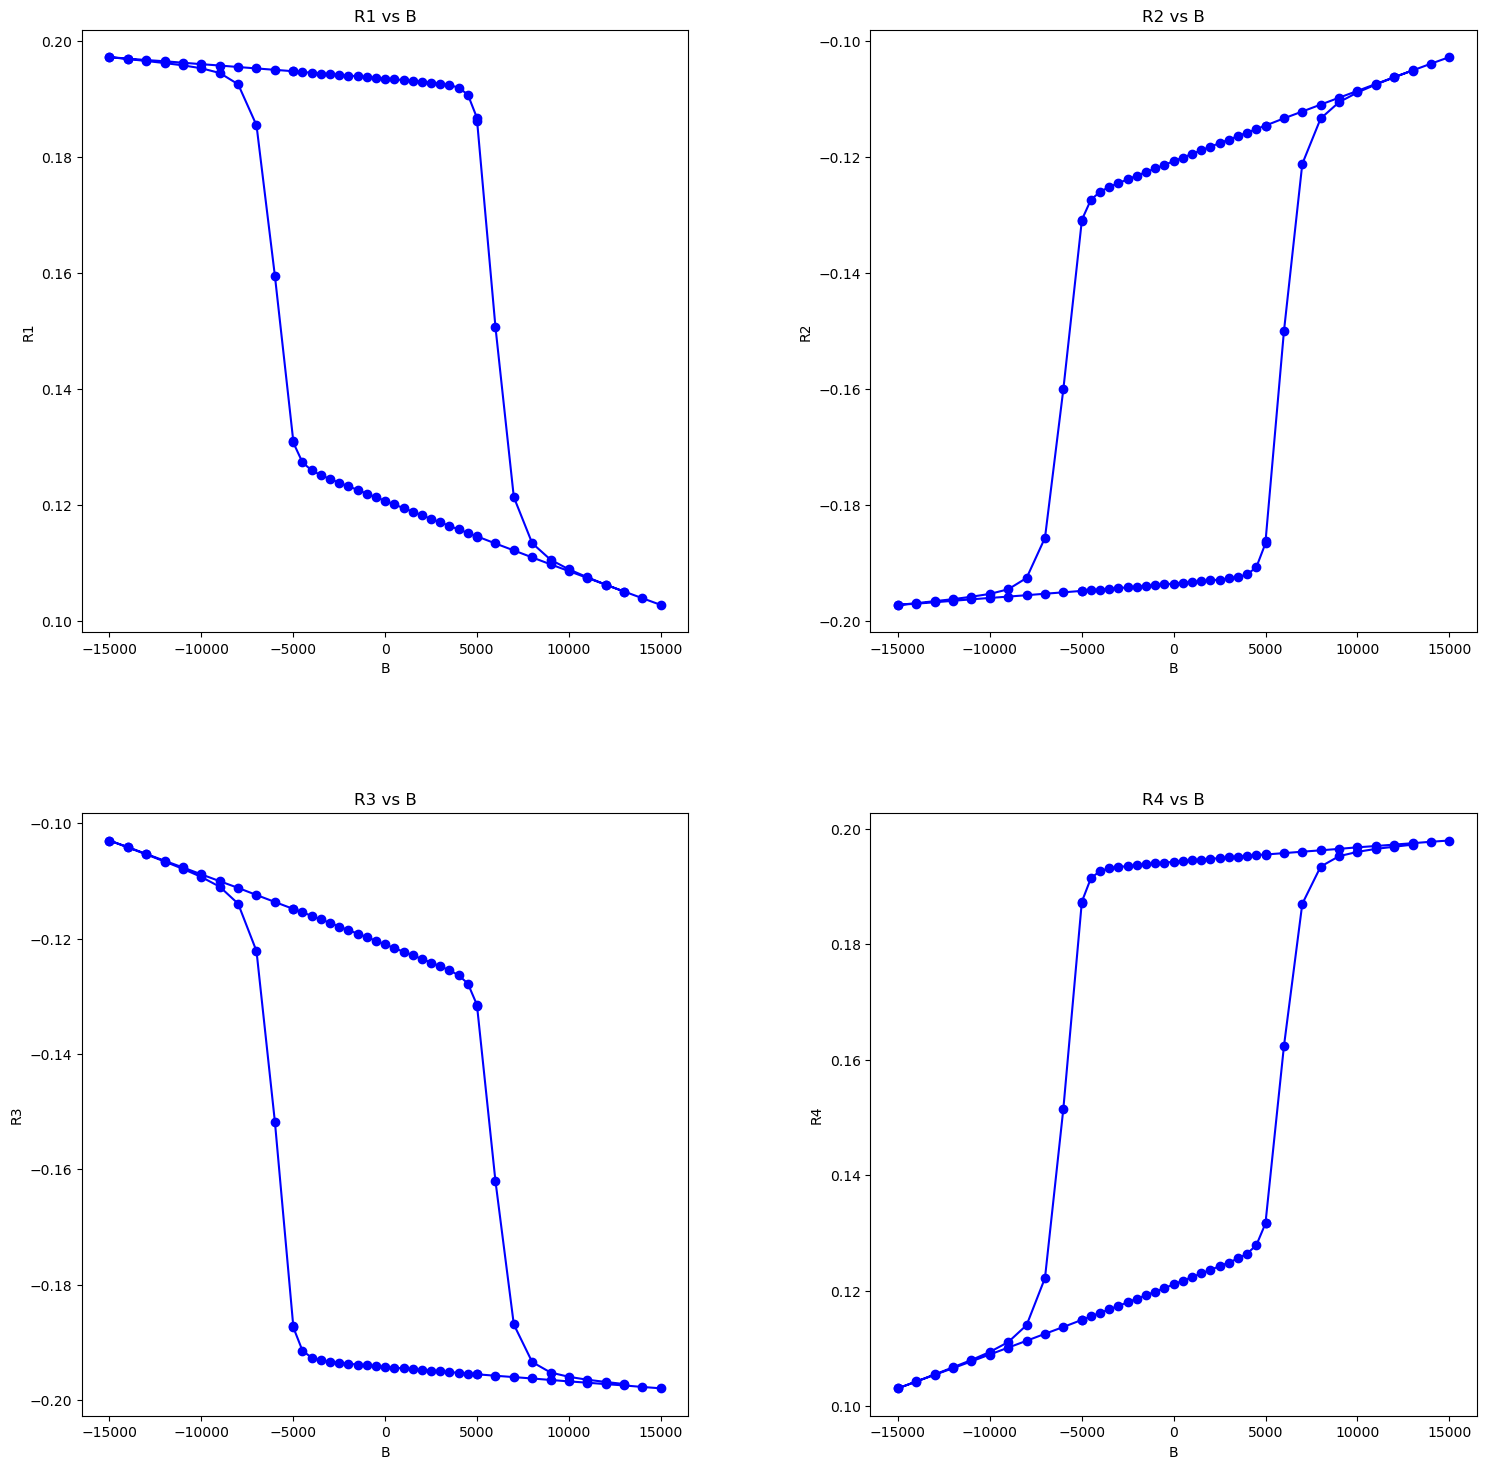

In [182]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [183]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

15000 -15000


In [184]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

42

In [185]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [186]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,15000.575781,15000,9.999969,102.742157,-102.761948,-197.942077,197.961568,1.640000e-07,1000000
1,0.001,14000.554004,14000,10.000032,103.897873,-103.893551,-197.704119,197.745375,1.201000e-07,1000000
2,0.001,13000.295703,13000,10.000033,105.059618,-105.069953,-197.440147,197.492945,8.660000e-08,1000000
3,0.001,12000.598975,12000,9.999999,106.235689,-106.217609,-197.215692,197.253533,7.390000e-08,1000000
4,0.001,11000.548877,11000,9.999980,107.400745,-107.395585,-196.963112,197.003893,5.360000e-08,1000000


In [187]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
43,0.001,-15000.040918,-15000,10.000049,197.213808,-197.200079,-103.020021,103.052969,-1.220000e-08,1000000
44,0.001,-14000.307471,-14000,10.000155,196.963044,-196.981006,-104.154217,104.230783,4.100000e-09,1000000
45,0.001,-13000.546387,-13000,10.000022,196.713052,-196.741847,-105.340080,105.393242,-1.300000e-09,1000000
46,0.001,-12000.394971,-12000,10.000120,196.504261,-196.489856,-106.525434,106.553054,-1.580000e-08,1000000
47,0.001,-11000.553027,-11000,10.000089,196.253313,-196.236116,-107.690582,107.729975,-2.620000e-08,1000000


In [188]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [189]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,15000,9.999969,102.742157,-102.761948,-197.942077,197.961568,197.213808,-197.200079,-103.020021,103.052969,1000000
1,0.001,14000,10.000032,103.897873,-103.893551,-197.704119,197.745375,196.963044,-196.981006,-104.154217,104.230783,1000000
2,0.001,13000,10.000033,105.059618,-105.069953,-197.440147,197.492945,196.713052,-196.741847,-105.340080,105.393242,1000000
3,0.001,12000,9.999999,106.235689,-106.217609,-197.215692,197.253533,196.504261,-196.489856,-106.525434,106.553054,1000000
4,0.001,11000,9.999980,107.400745,-107.395585,-196.963112,197.003893,196.253313,-196.236116,-107.690582,107.729975,1000000


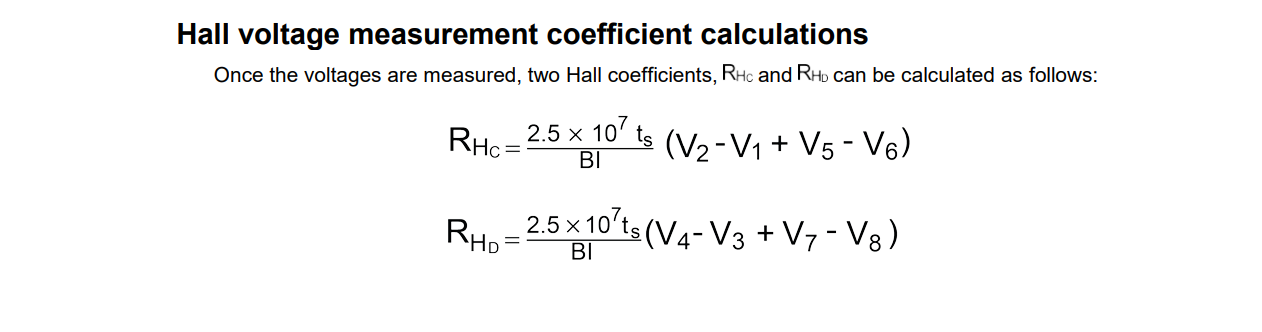
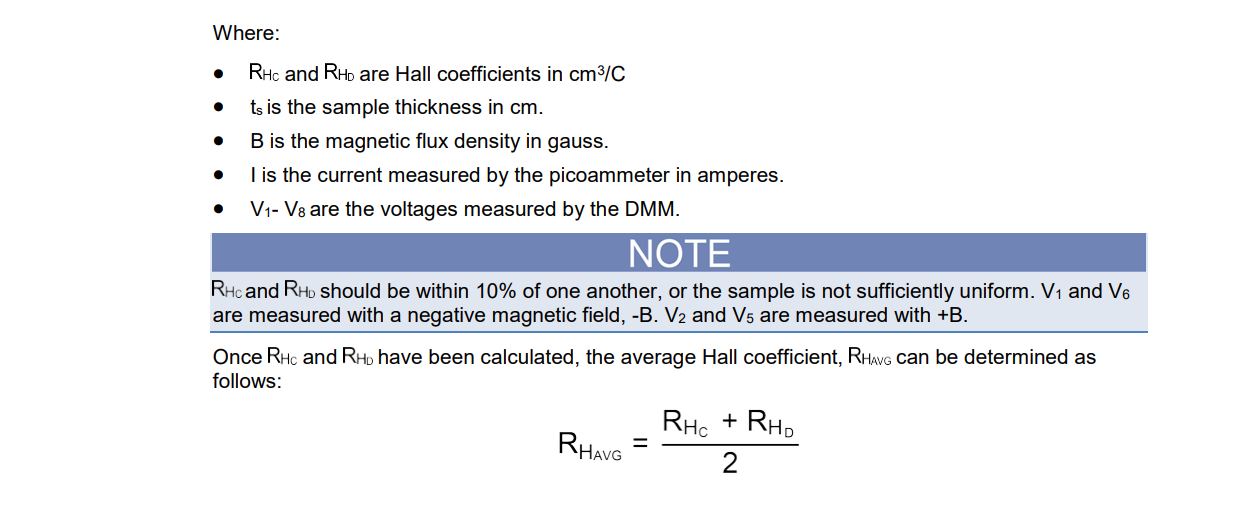

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [190]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

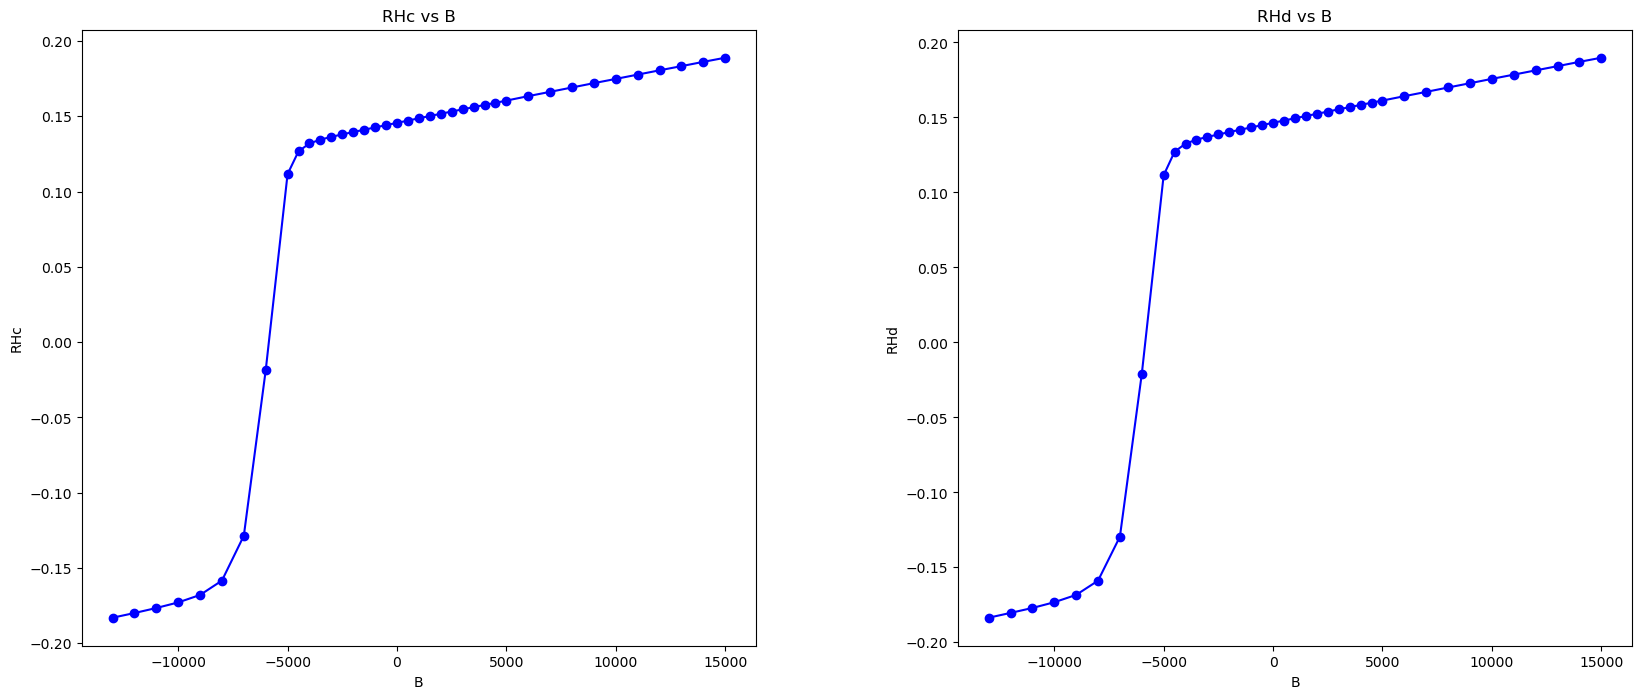

In [191]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

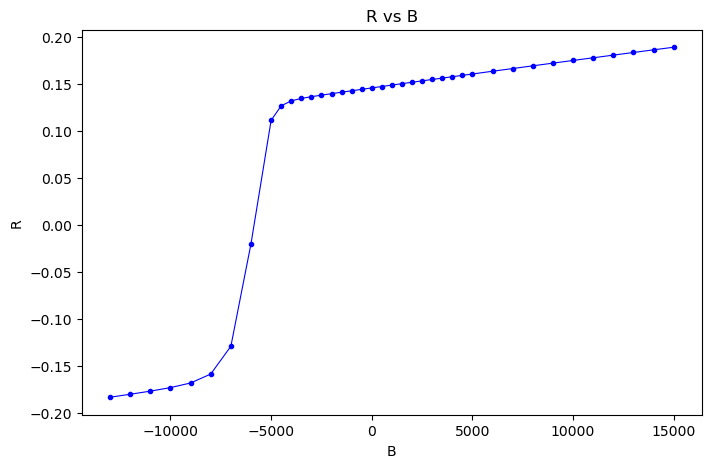

In [192]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [193]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-15000,10.000049,197.213808,-197.200079,-103.020021,103.052969,102.742157,-102.761948,-197.942077,197.961568,1000000
1,0.001,-14000,10.000155,196.963044,-196.981006,-104.154217,104.230783,103.897873,-103.893551,-197.704119,197.745375,1000000
2,0.001,-13000,10.000022,196.713052,-196.741847,-105.340080,105.393242,105.059618,-105.069953,-197.440147,197.492945,1000000
3,0.001,-12000,10.000120,196.504261,-196.489856,-106.525434,106.553054,106.235689,-106.217609,-197.215692,197.253533,1000000
4,0.001,-11000,10.000089,196.253313,-196.236116,-107.690582,107.729975,107.400745,-107.395585,-196.963112,197.003893,1000000


### Hall resistance calculation

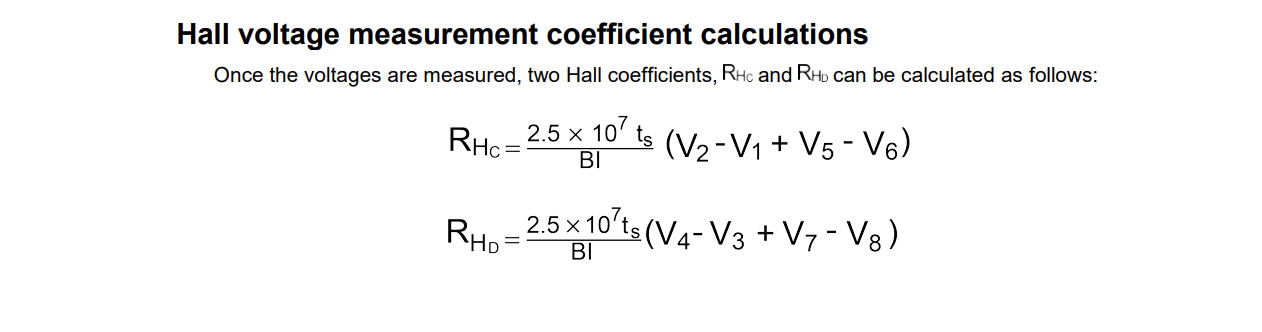

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [194]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

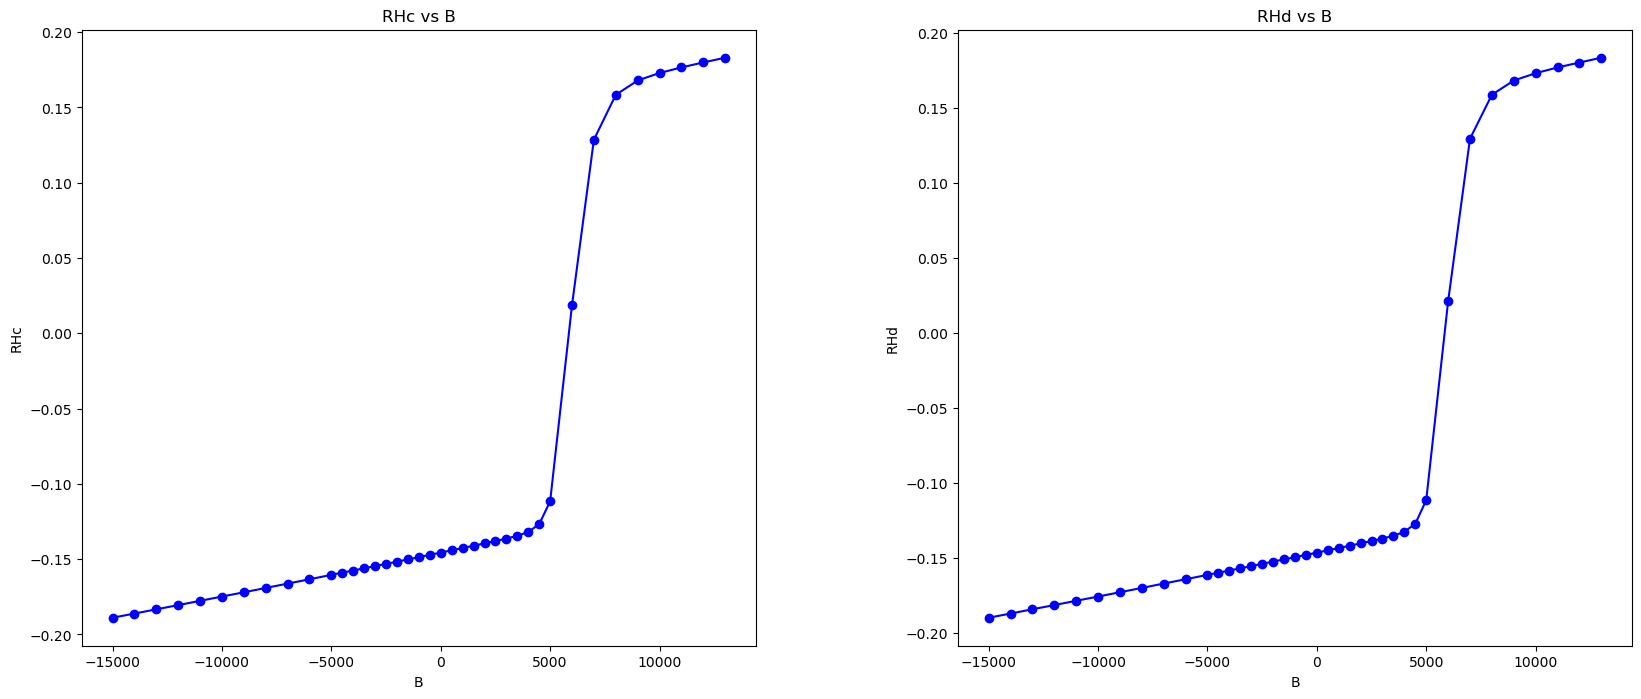

In [195]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

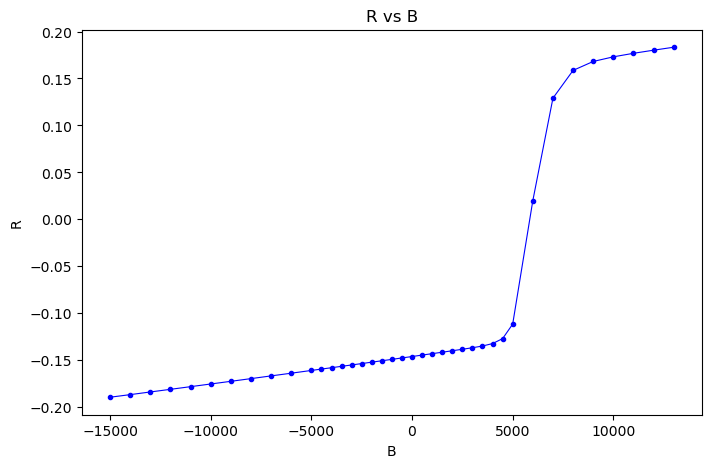

In [196]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

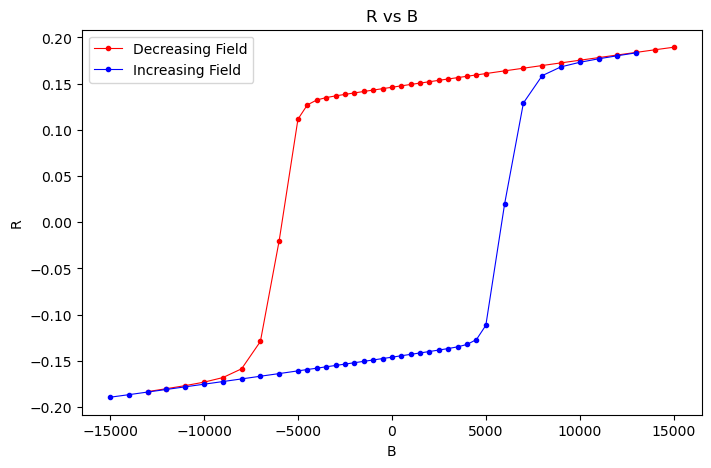

In [197]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()